# Bubble Chart - Preliminary Version

In [1]:
#------------ Importing the libraries ------------#

import dash
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc

from dash import callback_context
from jupyter_dash import JupyterDash
from plotly.subplots import make_subplots
from dash.dependencies import Input, Output

C:\Users\vaju1001\AppData\Local\Temp\1/ipykernel_13056/2265523173.py:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\vaju1001\AppData\Local\Temp\1/ipykernel_13056/2265523173.py:11: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


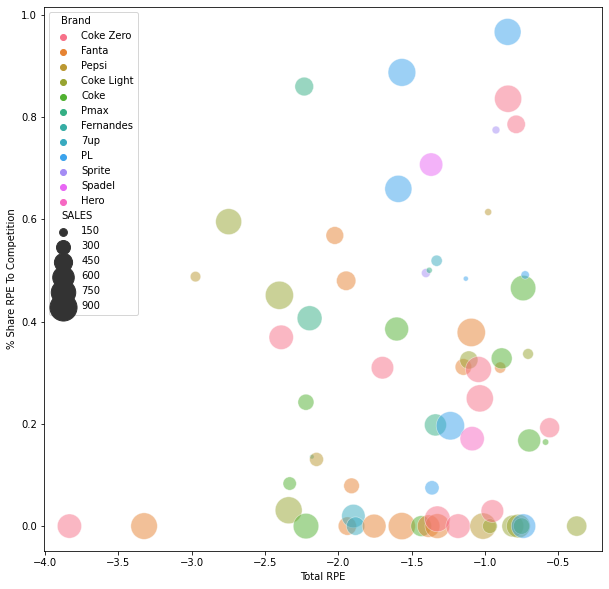

In [2]:
#------------ Reading and loading the dummy dataset ------------#

data = pd.read_excel('CCEP-BubbleChart-Test.xlsx')
data.sort_values(by = ['Total PE ', 'To competition', 'SALES'], ignore_index=True, inplace=True)

#------------ Counting the total number of observartions in each column & checking NaN values ------------#

data.count()
data.isna().sum()

#------------ Making a preliminary bubble plot ------------#

plt.figure(figsize=(10, 10))
sns.scatterplot(data = data, x = data['Total PE '], y = data['To competition'], size = data['SALES'], hue = data['Brand'] ,alpha = 0.5, legend = True, sizes=(20, 800))
plt.xlabel('Total RPE')
plt.ylabel('% Share RPE To Competition')

#------------ Participation Total Sales Estimation ------------#

total_sales = data.groupby(['Brand']).sum()['SALES']
total_sales = total_sales.to_frame()
total_sales = total_sales.rename(columns={"SALES": "Total Sales"})
data = pd.merge(data, total_sales, on='Brand', how='left')
data['Participation Total Sales'] = data['SALES']/data['Total Sales']

In [14]:
link_logo = 'https://pbs.twimg.com/profile_images/1372270653773123593/0-V4pVMM_400x400.png'

app = JupyterDash(__name__, external_stylesheets = [dbc.themes.BOOTSTRAP], meta_tags=[{'content': 'width=device-width'}])

#------------ Layout section: Boostrap ------------#

app.layout = dbc.Container([

    dbc.Navbar(

        html.A(

            dbc.Row(
                [
                    dbc.Col(html.Img(src = link_logo, height = '55px'), className = 'ms-4'),
                    dbc.Col(dbc.NavbarBrand(html.H2('Bubble Chart Tool', style = {'font-family': 'Verdana', 'font-weight': 'bold'}), className = 'float-end')),
                ],
                justify = 'start', 
                align = 'center', 
                className = 'g-0',
            ), 
            href = 'https://nielseniq.com/global/en/', 
            style = {'textDecoration': 'none'},

        ),
        color = 'dark', 
        dark = True,
    ),

    dbc.Row([

        dbc.Col([

            dbc.Row([

                dbc.Col([

                    html.P('Select segments', style = {'font-family': 'Verdana', 'font-weight': 'bold'} , className = 'h5 mt-3'),

                    #######
                    dcc.Checklist(["Select all"], [], id="all-segments", style = {'font-family': 'Verdana'}, inline=True),
                    #######

                    dcc.Checklist(
                        options = data['Segment'].unique(), labelStyle = {'display': 'block'}, style = {'font-family': 'Verdana'},
                        id='segment-checklist'),
                    ], width = {'size': 5, 'offset': 1}),
                
                dbc.Col([
                    html.P('Select markets', style = {'font-family': 'Verdana', 'font-weight': 'bold'}, className = 'h5 mt-3'),

                    #######
                    dcc.Checklist(["Select all"], [], id="all-markets", style = {'font-family': 'Verdana'}, inline=True),
                    #######

                    dcc.Checklist(
                        options = data['Market'].unique(), labelStyle = {'display': 'block'}, style = {'font-family': 'Verdana'},
                        id='market-checklist'),
                    ]),
                ]),
            
            dbc.Row([

                dbc.Col([

                    html.P('Select manufacturers', style = {'font-family': 'Verdana', 'font-weight': 'bold'}, className = 'h5 mt-3'),

                    #######
                    dcc.Checklist(["Select all"], [], id="all-manufacturers", style = {'font-family': 'Verdana'}, inline=True),
                    #######

                    dcc.Checklist(
                        options = data['Manufacturer'].unique(), labelStyle = {'display': 'block'}, style = {'font-family': 'Verdana'},
                        id='manufacturer-checklist'),
                        ], width = {'size': 5, 'offset': 1}),
                
                dbc.Col([
                    html.P('Select brands', style = {'font-family': 'Verdana', 'font-weight': 'bold'}, className = 'h5 mt-3'),

                    #######
                    dcc.Checklist(["Select all"], [], id="all-brands", style = {'font-family': 'Verdana'}, inline=True),
                    #######

                    dcc.Checklist(
                        options = data['Brand'].unique(), labelStyle = {'display': 'block'}, style = {'font-family': 'Verdana'},
                        id='brand-checklist'),
                    ]),
            ]),
        
        ], className = 'ms-5 mt-4 pb-3 border rounded'),
    
        dbc.Col([

            dbc.Row([

            dcc.Upload(
                    id='upload-data',
                    children=html.Div([
                        'Drag and Drop or ',
                        html.A('Select Files')
                    ]),
                    style={
                        'width': '100%',
                        'height': '60px',
                        'lineHeight': '60px',
                        'borderWidth': '1px',
                        'borderStyle': 'dashed',
                        'borderRadius': '5px',
                        'textAlign': 'center',
                        'margin': '10px'
                    },
                    # Allow multiple files to be uploaded
                    multiple=True
            ),

            dbc.Col([

                html.P('Select item', style = {'font-family': 'Verdana', 'font-weight': 'bold'}, className = 'h5 mt-3'),

               #######
                dcc.Checklist(["Select all"], [], id="all-items", style = {'font-family': 'Verdana'}, inline=True),
                #######

                dcc.Checklist(
                    options = data['PPG name'].unique(), labelStyle = {'display': 'block'}, style = {'font-family': 'Verdana'},
                    id='item-checklist')

            ], width = {'size': 5, 'offset': 0}),

            dbc.Col([

                html.P('Price increase (%)', style = {'font-family': 'Verdana', 'font-weight': 'bold'}, className = 'h5 mt-3'),

                dcc.Input(id='price-raise', value=10, type='number', style = {'font-family': 'Verdana'}, debounce = True),  

            ], width = {'size': 3, 'offset': 0}),

             dbc.Col([

                html.P('Order by:', style = {'font-family': 'Verdana', 'font-weight': 'bold'}, className = 'h5 mt-3 ms-1'),

                dcc.Dropdown(id='order-dropdown', options=[{'label': 'Total', 'value': 'Losses'},
                                                   {'label': 'Own', 'value': 'Own Losses'},
                                                   {'label': 'Internal', 'value': 'Internal Losses'},
                                                   {'label': 'External', 'value': 'External Losses'}], 
                                                   style = {'font-family': 'Verdana'}, value='Losses', className = 'ms-1') 

            ], width = {'size': 3, 'offset': 1})
            ]),
        ],className = 'ms-5 mt-4 me-5 pb-1 border rounded'),

    ], className = 'ms-5 mt-4 me-5 pb-3 border rounded'),
    
    dbc.Row([
        dbc.Col([dcc.Graph(id = 'bubble_chart', figure = {})], width = {'size': 4, 'offset': 0}, className = 'ms-5'),
        dbc.Col([dcc.Graph(id = 'bar-line chart', figure = {})], width = {'size': 5, 'offset': 2}, className = 'me-5'),
            ], justify = 'between',
        ),
    
], fluid = True)

#------------ Select All Segments ------------#

@app.callback(
    [Output("segment-checklist", "value"),
     Output("all-segments", "value")],
    [Input("segment-checklist", "value"),
     Input("all-segments", "value")]
)

def sync_checklists(segments_selected, all_segments):
    ctx = callback_context
    input_id = ctx.triggered[0]["prop_id"].split(".")[0]
    if input_id == "segment-checklist":
        all_segments = ["Select All"] if set(segments_selected) == set(data['Segment'].unique()) else []
    else:
        segments_selected = data['Segment'].unique() if all_segments else []
    return segments_selected, all_segments

#------------ Select All Markets ------------#

@app.callback(
    [Output("market-checklist", "value"),
     Output("all-markets", "value")],
    [Input("market-checklist", "value"),
     Input("all-markets", "value")]
)

def sync_checklists(markets_selected, all_markets):
    ctx = callback_context
    input_id = ctx.triggered[0]["prop_id"].split(".")[0]
    if input_id == "market-checklist":
        all_markets = ["Select All"] if set(markets_selected) == set(data['Market'].unique()) else []
    else:
        markets_selected = data['Market'].unique() if all_markets else []
    return markets_selected, all_markets

#------------ Select All Manufacturers ------------#

@app.callback(
    [Output("manufacturer-checklist", "value"),
     Output("all-manufacturers", "value")],
    [Input("manufacturer-checklist", "value"),
     Input("all-manufacturers", "value")]
)

def sync_checklists(manufacturers_selected, all_manufacturers):
    ctx = callback_context
    input_id = ctx.triggered[0]["prop_id"].split(".")[0]
    if input_id == "manufacturer-checklist":
        all_manufacturers = ["Select All"] if set(manufacturers_selected) == set(data['Manufacturer'].unique()) else []
    else:
        manufacturers_selected = data['Manufacturer'].unique() if all_manufacturers else []
    return manufacturers_selected, all_manufacturers

#------------ Select All Brands ------------#

@app.callback(
    [Output("brand-checklist", "value"),
     Output("all-brands", "value")],
    [Input("brand-checklist", "value"),
     Input("all-brands", "value")]
)

def sync_checklists(brands_selected, all_brands):
    ctx = callback_context
    input_id = ctx.triggered[0]["prop_id"].split(".")[0]
    if input_id == "brand-checklist":
        all_brands = ["Select All"] if set(brands_selected) == set(data['Brand'].unique()) else []
    else:
        brands_selected = data['Brand'].unique() if all_brands else []
    return brands_selected, all_brands

#------------ Select All Items ------------#

@app.callback(
    [Output("item-checklist", "value"),
     Output("all-items", "value")],
    [Input("item-checklist", "value"),
     Input("all-items", "value")]
)

def sync_checklists(items_selected, all_items):
    ctx = callback_context
    input_id = ctx.triggered[0]["prop_id"].split(".")[0]
    if input_id == "item-checklist":
        all_items = ["Select All"] if set(items_selected) == set(data['PPG name'].unique()) else []
    else:
        items_selected = data['PPG name'].unique() if all_items else []
    return items_selected, all_items

#------------ Update market checklist ------------#

@app.callback(
    Output(component_id='market-checklist', component_property='options'),
    [Input(component_id='segment-checklist', component_property='value')]
)

def update_market_checklist(segment_value):
    dff = data[data["Segment"].isin(segment_value)]
    market_list = dff["Market"].unique()
    return market_list

#------------ Update manufacturers checklist ------------#

@app.callback(
    Output(component_id='manufacturer-checklist', component_property='options'),
    [Input(component_id='segment-checklist', component_property='value'),
     Input(component_id='market-checklist', component_property='value')]
)

def update_manufacturer_checklist(segment_value, market_value):
    dff = data[data["Segment"].isin(segment_value)]
    dff = dff[dff["Market"].isin(market_value)]
    manufacturer_list = dff["Manufacturer"].unique()
    return manufacturer_list

#------------ Update brand checklist ------------#

@app.callback(
    Output(component_id='brand-checklist', component_property='options'),
    [Input(component_id='segment-checklist', component_property='value'),
     Input(component_id='market-checklist', component_property='value'),
     Input(component_id='manufacturer-checklist', component_property='value')]
)

def update_brand_checklist(segment_value, market_value, manufacturer_value):
    dff = data[data["Segment"].isin(segment_value)]
    dff = dff[dff["Market"].isin(market_value)]
    dff = dff[dff["Manufacturer"].isin(manufacturer_value)]
    brand_list = dff["Brand"].unique()
    return brand_list

#------------ Update items dropdown ------------#

@app.callback(
    Output(component_id='item-checklist', component_property='options'),
    [Input(component_id='segment-checklist', component_property='value'),
     Input(component_id='market-checklist', component_property='value'),
     Input(component_id='manufacturer-checklist', component_property='value'),
     Input(component_id='brand-checklist', component_property='value')]
)

def update_item_dropdown(segment_value, market_value, manufacturer_value, brand_value):
    dff = data[data["Segment"].isin(segment_value)]
    dff = dff[dff["Market"].isin(market_value)]
    dff = dff[dff["Manufacturer"].isin(manufacturer_value)]
    dff = dff[dff["Brand"].isin(brand_value)]
    item_list = dff["PPG name"].unique()
    return item_list

#------------ Update Bubble Chart ------------#

@app.callback(
    Output(component_id='bubble_chart', component_property='figure'),
    [Input(component_id='segment-checklist', component_property='value'),
     Input(component_id='market-checklist', component_property='value'),
     Input(component_id='manufacturer-checklist', component_property='value'),
     Input(component_id='brand-checklist', component_property='value')],
    prevent_initial_call = False
)

def update_my_graph(segment_value, market_value, manufacturer_value, brand_value):
    
    #print(f"Brand: {brand_value}")
    #print(f"Manufacturer: {manufacturer_value}")
    dff = data[data["Segment"].isin(segment_value)]
    dff = dff[dff["Market"].isin(market_value)]
    dff = dff[dff["Manufacturer"].isin(manufacturer_value)]
    dff = dff[dff["Brand"].isin(brand_value)]

    fig = px.scatter(dff, x = 'Total PE ', y = 'To competition', size = 'SALES', color = 'Brand', 
                        custom_data = ['PPG name', 'SALES', 'Participation Total Sales' ,'Brand', 'Manufacturer', 'Market', 'Segment'],
                        size_max = 40, width = 1200, height = 900)
    
    fig.update_layout(yaxis_tickformat = '.0%')

    fig.update_xaxes(autorange = "reversed")
    
    fig.update_traces(
        hovertemplate = "<br>".join([
            "<b>%{customdata[0]}</b><br>",
            "Total PE: %{x:.1f}",
            "To Competition: %{y:.1%}",
            "Sales: %{customdata[1]:.1f}",
            "Participation of Brand Total Sales: %{customdata[2]:.1%}",
            "Brand: %{customdata[3]}",
            "Manufacturer: %{customdata[4]}",
            "Market: %{customdata[5]}",
            "Segment: %{customdata[6]}",
            ])
    )

    return fig

#------------ Update Bar and Line Charts ------------#

@app.callback(
    Output(component_id='bar-line chart', component_property='figure'),
    [Input(component_id='segment-checklist', component_property='value'),
     Input(component_id='market-checklist', component_property='value'),
     Input(component_id='manufacturer-checklist', component_property='value'),
     Input(component_id='brand-checklist', component_property='value'),
     Input(component_id='item-checklist', component_property='value'),
     Input(component_id='price-raise', component_property='value'),
     Input(component_id='order-dropdown', component_property='value')],
    prevent_initial_call = False
)

def update_my_graph(segment_value, market_value, manufacturer_value, brand_value, item_value, raise_value, order_value):
    
    dff = data[data["Segment"].isin(segment_value)]
    dff = dff[dff["Market"].isin(market_value)]
    dff = dff[dff["Manufacturer"].isin(manufacturer_value)]
    dff = dff[dff["Brand"].isin(brand_value)]
    dff = dff[dff["PPG name"].isin(item_value)]
    
    if raise_value != None:
        dff['Price raise'] = 1 + (raise_value/100)
    else:
        dff['Price raise'] = 1 + (0/100)
    
    
    dff['Sales index'] = 1-np.power(dff['Price raise'],dff['Total PE '])
    dff['Losses'] = dff['SALES']*dff['Sales index']

    dff['Own sales index'] = dff['Sales index']*dff['To own'] 
    dff['Own Losses'] = dff['SALES']*dff['Own sales index']

    dff['Internal sales index'] = dff['Sales index']*dff['Within portfolio'] 
    dff['Internal Losses'] = dff['SALES']*dff['Internal sales index']

    dff['External sales index'] = dff['Sales index']*dff['To competition'] 
    dff['External Losses'] = dff['SALES']*dff['External sales index']
    
    dff.sort_values(by=order_value, ascending=True, inplace=True)
    array_order = dff[order_value].tolist()

    bar_line = go.Figure()
    bar_line.add_trace(go.Bar(
        y=dff['PPG name'],
        x=dff['Own Losses'],
        name='Own Losses',
        orientation='h',
        marker=dict(
            color='rgb(241, 196, 15)'
        ), hovertemplate = "<br>".join([
            "<b>%{y}</b><br>",
            "%{x:$}",
            ])
    ))
    bar_line.add_trace(go.Bar(
        y=dff['PPG name'],
        x=dff['Internal Losses'],
        name='Internal Losses',
        orientation='h',
        marker=dict(
            color='rgb(230, 126, 34)'
        ), hovertemplate = "<br>".join([
            "<b>%{y}</b><br>",
            "%{x:$}",
            ])
    ))
    bar_line.add_trace(go.Bar(
        y=dff['PPG name'],
        x=dff['External Losses'],
        name='External Losses',
        orientation='h',
        marker=dict(
            color='rgb(255, 73, 73)'
        ), hovertemplate = "<br>".join([
            "<b>%{y}</b><br>",
            "%{x:$}",
            ])
    ))

    bar_line.update_layout(barmode='stack', width = 900, height = 900, xaxis={'categoryorder':'array', 'categoryarray':array_order})

    x_nw = np.round(dff['Own Losses'], decimals = 2)
    x_t = np.round(dff['Internal Losses'], decimals = 2)
    x_s = np.round(dff['External Losses'], decimals = 2)

    x_k = np.round(dff['Own sales index'] * 100, decimals = 0)
    x_w = np.round(dff['Internal sales index'] * 100, decimals = 0)
    x_h = np.round(dff['External sales index'] * 100, decimals = 0)

    annotations = []

    # Adding Labels
    for yd, xo, xi, xe, xp_1, xp_2, xp_3 in zip(dff['PPG name'], x_nw, x_t, x_s, x_k, x_w, x_h):
        # Labeling sales losses of each bar (x-axis)
        if xo != 0:
            annotations.append(dict(xref = 'x', yref = 'y',
                                    x = xo / 2, y = yd,
                                    text = str(xo),
                                    font = dict(family = 'Arial', size = 14,
                                            color = 'rgb(0, 0, 0)'),
                                    showarrow = False))
                                
        if xi != 0:
            annotations.append(dict(xref = 'x', yref = 'y',
                                    x = xo + (xi / 2), y = yd,
                                    text = str(xi),
                                    font = dict(family = 'Arial', size = 14,
                                            color = 'rgb(0, 0, 0)'),
                                    showarrow = False))

        if xe != 0:
            annotations.append(dict(xref = 'x', yref = 'y',
                                    x = xo + xi + (4 * xe / 5), y = yd,
                                    text = str(xe),
                                    font = dict(family = 'Arial', size = 14,
                                            color = 'rgb(0, 0, 0)'),
                                    showarrow = False))

    bar_line.update_layout(annotations = annotations)

    return bar_line

#------------ Display ------------#

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash app running on http://127.0.0.1:8050/
